## Import statements

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping
import sklearn.model_selection as m_sel
import plotly.offline as plot
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
plot.offline.init_notebook_mode(connected=True)
import pandas as pd
import numpy as np
import math

Using TensorFlow backend.


### Reading the data file 

In [2]:
data = pd.read_csv("ENB2012_data.csv")

 Batch size and the epochs 

In [3]:
batch_size = 64
epochs = 50

### Setting separate testing and training data

In [4]:
X_rl = data[['X1','X2','X3','X4','X5','X6','X7','X8']]
Y_rl = data[['Y1','Y2']]
x_train, x_test, y_train, y_test = m_sel.train_test_split(X_rl, Y_rl, test_size=0.30, random_state=20)

### Analysing the histogram for setting the bins

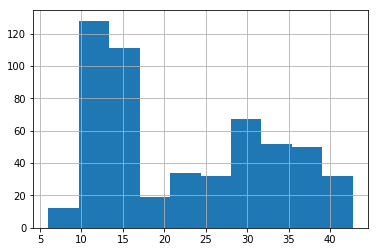

In [5]:
y_train.Y1.hist()
plt.show()

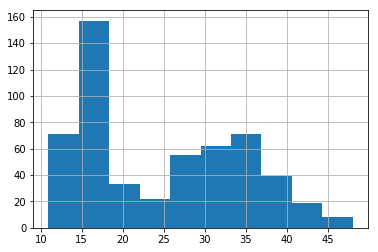

In [6]:
y_train.Y2.hist()
plt.show()

In [7]:
print("min value of Y1 ",data['Y1'].min()," -------- "," max value of Y1",data['Y1'].max())
print("floored min value of Y1 ",math.floor(data['Y1'].min())," -------- ","ceiled max value of Y1 ",math.ceil(data['Y1'].max()))
print("max value of Y1/min value of Y1 ",data['Y1'].max()/data['Y1'].min())
rn1 = list(np.linspace(math.floor(data['Y1'].min()), math.ceil(data['Y1'].max()), 4))
print("values ", rn1)

min value of Y1  6.01  --------   max value of Y1 43.1
floored min value of Y1  6  --------  ceiled max value of Y1  44
max value of Y1/min value of Y1  7.17138103161
values  [6.0, 18.666666666666664, 31.333333333333332, 44.0]


In [8]:
print("min value of Y2 ",data['Y2'].min()," -------- "," max value of Y2",data['Y2'].max())
print("floored min value of Y2 ",math.floor(data['Y2'].min())," -------- ","ceiled max value of Y2 ",math.ceil(data['Y2'].max()))
print("max value of Y2/min value of Y2 ",data['Y2'].max()/data['Y2'].min())
rn2 = list(np.linspace(math.floor(data['Y2'].min()), math.ceil(data['Y2'].max()), data['Y2'].max()/data['Y2'].min()))
print("values ", rn2)

min value of Y2  10.9  --------   max value of Y2 48.03
floored min value of Y2  10  --------  ceiled max value of Y2  49
max value of Y2/min value of Y2  4.40642201835
values  [10.0, 23.0, 36.0, 49.0]


/home/user/dnn/week6/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.



#### Setting the number of classes 

In [9]:
num_classes1 = len(rn1)-1
num_classes2 = len(rn2)-1

#### Setting the bins for Output data 

In [10]:
Y1_train_class = pd.cut(y_train['Y1'],rn1,labels = list(range(0,len(rn1)-1)))
Y1_test_class = pd.cut(y_test['Y1'],rn1,labels = list(range(0,len(rn1)-1)))


Y2_train_class = pd.cut(y_train['Y2'],rn2,labels = list(range(0,len(rn2)-1)))
Y2_test_class = pd.cut(y_test['Y2'],rn2,labels = list(range(0,len(rn2)-1)))

#### Converting dataframe to matrix 

In [11]:
x_train = x_train.as_matrix()
x_test = x_test.as_matrix()
y_train1 = Y1_train_class.as_matrix()
y_test1 = Y1_test_class.as_matrix()
y_train2 = Y2_train_class.as_matrix()
y_test2 = Y2_test_class.as_matrix()

#### Converting output data to keras binary array

In [12]:
y_train1 = keras.utils.to_categorical(y_train1, num_classes1)
y_test1 = keras.utils.to_categorical(y_test1, num_classes1)

y_train2 = keras.utils.to_categorical(y_train2, num_classes2)
y_test2 = keras.utils.to_categorical(y_test2, num_classes2)

#### Function for adding layers 

In [27]:
def addlayers_m1(n, model):    
    while (n != 0):
        n -= 1
        model.add(Dense(500, activation='sigmoid', input_shape=(8,)))
    model.add(Dense(num_classes1, activation='softmax'))  
    return model

#### Function for hidden layer with dropout

In [29]:
def addlayers_dropout_m1(n, model):    
    while (n != 0):
        n -= 1
        model.add(Dense(500, activation='sigmoid', input_shape=(8,)))
        model1.add(Dropout(0.2))
    model.add(Dense(num_classes1, activation='softmax'))  
    
    return model

#### Function for hidden layer for model 2

In [30]:
def addlayers_m2(n,model2):
    if n == 1:
        model2.add(Dense(500, activation='sigmoid', input_shape=(8,)))
    elif n>1:
        k=1
        model2.add(Dense(500, activation='sigmoid', input_shape=(8,)))
        while k < n:
            model2.add(Dense(500, activation='sigmoid'))
            k = k + 1        
    model2.add(Dense(num_classes2, activation='softmax'))
    return model2

#### Function for hidden layer with dropout

In [31]:
def addlayers_dropout_m2(n,model2):
    model2.add(Dropout(0.2, input_shape=(8,)))
    if n == 1:
        model2.add(Dense(500,kernel_initializer='normal', activation='sigmoid', kernel_constraint=maxnorm(3)))
        model2.add(Dropout(0.2))    
    elif n>1:
        k=1
        while k < n:
            model2.add(Dense(500,kernel_initializer='normal', activation='sigmoid', kernel_constraint=maxnorm(3)))
            model2.add(Dropout(0.2))
            k = k + 1        
    model2.add(Dense(num_classes2,kernel_initializer='normal', activation='softmax'))
    return model2

#### Model 1 summary

In [32]:
def model1_summary(n, dropout):
    model1 = keras.models.Sequential()
    if dropout:
        print("***************************************")
        print("MODEL1 WITH DROPOUT")
        print("\n")
        print("\n")
        model1 = addlayers_dropout_m1(n,model1)
    else:
        print("***************************************")
        print("MODEL1 WITHOUT DROPOUT")
        print("\n")
        print("\n")
        model1 = addlayers_m1(n,model1)
    print("\n")
    print("\n")
    print("***************************************")
    print("MODEL1 SUMMARY")
    print("\n")
    print("\n")
    model1.summary()
    model1.compile(optimizer=RMSprop(),
                 loss='categorical_crossentropy',
                 metrics = ['accuracy'])
    print("\n")
    print("***************************************")
    print("MODEL1 HISTORY WITH ",n," LAYERS")
    print("\n")
    m1 = model1.fit(x_train, 
              y_train1, 
              batch_size=batch_size, 
              epochs=epochs, 
              validation_split = 0.30,
              verbose=2)
    print("\n")
    print("***************************************")
    print("EPOCHS VS ACCURACY GRAPH AND VALIDATION ACCURACY")
    print("\n")
    trace1 = go.Scatter(
        x = list(range(1,51)),
        y = m1.history['acc'],
        mode = 'lines+markers',
        name = 'ACCURACY'
    )
    trace2 = go.Scatter(
        x = list(range(1,51)),
        y = m1.history['val_acc'],
        mode = 'lines+markers',
        name = 'VALIDATION ACCURACY'
    )
    data = [trace1,trace2]
    plot.iplot(data, filename='EPOCHS VS ACCURACY GRAPH AND VALIDATION ACCURACY')
    print("\n")
    print("***************************************")
    print("CROSS TAB")
    print("\n")
    y_hat1 = model1.predict_classes(x_test)
    y1 = pd.crosstab(y_hat1,Y1_test_class)
    print("\n")
    print("\n")
    print(y1)
    return m1.history['acc'], m1.history['val_acc']

#### Model 1

In [18]:
acc1 = []
val_acc1 = []
for i in list(range(1,11,1)):
    a,va = model1_summary(i,True)
    acc1.append(np.average(np.array(a)) * 100)
    val_acc1.append(np.average(np.array(va)) * 100)
print("\n")
print("***************************************")
print("COMPARISON OF ALL MODELS BASED ON TRAINING ACCURACY AND TEST ACCURACY")
print("\n")
trace1 = go.Bar(
    x = ['1 LAYER', '2 LAYER', '3 LAYER ', '4 LAYER ', '5 LAYER ', '6 LAYER ', '7 LAYER ', '8 LAYER ', '9 LAYER ', 
       '10 LAYER '],
    y = acc1,
    name = 'TRAINING ACCURACY'
)
trace2 = go.Bar(
    x = ['1 LAYER', '2 LAYER', '3 LAYER ', '4 LAYER ', '5 LAYER ', '6 LAYER ', '7 LAYER ', '8 LAYER ', '9 LAYER ', 
       '10 LAYER '],
    y = val_acc1,
    name = 'TESTING ACCURACY'
)
data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)
fig = go.Figure(data=data, layout=layout)
plot.iplot(fig, filename='grouped-bar')

***************************************
MODEL1 WITH DROPOUT








***************************************
MODEL1 SUMMARY




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4500      
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1503      
Total params: 6,003
Trainable params: 6,003
Non-trainable params: 0
_________________________________________________________________


***************************************
MODEL1 HISTORY WITH  1  LAYERS


Train on 375 samples, validate on 162 samples
Epoch 1/50
0s - loss: 1.



***************************************
CROSS TAB


 32/231 [===>..........................] - ETA: 0s



Y1       0   1   2
row_0             
0      116   4   0
1        2  34   6
2        1  15  53
***************************************
MODEL1 WITH DROPOUT








***************************************
MODEL1 SUMMARY




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               4500      
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 1503      
Total params: 6,003
Trainable params: 6,003
Non-trainable params: 0
________



***************************************
CROSS TAB


 32/231 [===>..........................] - ETA: 0s



Y1       0   1   2
row_0             
0      116   4   0
1        2  40  37
2        1   9  22
***************************************
MODEL1 WITH DROPOUT








***************************************
MODEL1 SUMMARY




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               4500      
_________________________________________________________________
dropout_6 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_7 



***************************************
CROSS TAB


 32/231 [===>..........................] - ETA: 0s



Y1       0   1   2
row_0             
0      116   4   0
1        2  39  29
2        1  10  30
***************************************
MODEL1 WITH DROPOUT








***************************************
MODEL1 SUMMARY




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               4500      
_________________________________________________________________
dropout_9 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_10



***************************************
CROSS TAB


 32/231 [===>..........................] - ETA: 0s



Y1       0   1   2
row_0             
0      116   4   0
1        3  42  36
2        0   7  23
***************************************
MODEL1 WITH DROPOUT








***************************************
MODEL1 SUMMARY




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_12 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 500)               4500      
_________________________________________________________________
dropout_13 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_14



***************************************
CROSS TAB


 32/231 [===>..........................] - ETA: 0s



Y1       0   1   2
row_0             
0      116   4   0
1        3  48  42
2        0   1  17
***************************************
MODEL1 WITH DROPOUT








***************************************
MODEL1 SUMMARY




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_17 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 500)               4500      
_________________________________________________________________
dropout_18 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_19



***************************************
CROSS TAB


 32/231 [===>..........................] - ETA: 0s



Y1       0   1   2
row_0             
0      116   4   0
2        3  49  59
***************************************
MODEL1 WITH DROPOUT








***************************************
MODEL1 SUMMARY




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_23 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 500)               4500      
_________________________________________________________________
dropout_24 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_25 (Dropout)         



***************************************
CROSS TAB


231/231 [==============================] - 0s     




Y1       0   1   2
row_0             
0      116   4   0
2        3  49  59
***************************************
MODEL1 WITH DROPOUT








***************************************
MODEL1 SUMMARY




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_30 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 500)               4500      
_________________________________________________________________
dropout_31 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_32 (Dropout)        



***************************************
CROSS TAB


231/231 [==============================] - 0s     




Y1       0   1   2
row_0             
0      116   4   0
1        3  49  59
***************************************
MODEL1 WITH DROPOUT








***************************************
MODEL1 SUMMARY




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_38 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 500)               4500      
_________________________________________________________________
dropout_39 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_40 (Dropout)        



***************************************
CROSS TAB


224/231 [============================>.] - ETA: 0s



Y1      0   1   2
row_0            
0      93   4   0
2      26  49  59
***************************************
MODEL1 WITH DROPOUT








***************************************
MODEL1 SUMMARY




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_47 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_47 (Dense)             (None, 500)               4500      
_________________________________________________________________
dropout_48 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_49 (Dropout)         (Non



***************************************
CROSS TAB


224/231 [============================>.] - ETA: 0s



Y1       0   1   2
row_0             
0      116   4   0
2        3  49  59


***************************************
COMPARISON OF ALL MODELS BASED ON TRAINING ACCURACY AND TEST ACCURACY




#### Model 2 summary

In [26]:
def model2_summary(n,dropout):
    model2 = keras.models.Sequential()
    if dropout:
        print("***************************************")
        print("MODEL2 WITH DROPOUT")
        print("\n")
        model2 = addlayers_dropout_m2(n,model2)
    else:
        print("***************************************")
        print("MODEL2 WITHOUT DROPOUT")
        print("\n")
        model2 = addlayers_m2(n,model2)
    print("\n")
    print("***************************************")
    print("MODEL2 SUMMARY")
    print("\n")
    model2.summary()
    model2.compile(optimizer=RMSprop(),
                 loss='categorical_crossentropy',
                 metrics = ['accuracy'])
    print("\n")
    print("***************************************")
    print("MODEL2 HISTORY WITH ",n," LAYERS")
    print("\n")
    m2 = model2.fit(x_train, 
              y_train2, 
              batch_size=batch_size, 
              epochs=epochs, 
              validation_split = 0.30,
              verbose=2)
    print("\n")
    print("***************************************")
    print("EPOCHS VS ACCURACY GRAPH AND VALIDATION ACCURACY")
    print("\n")
    trace1 = go.Scatter(
        x = list(range(1,51)),
        y = m2.history['acc'],
        mode = 'lines+markers',
        name = 'ACCURACY'
    )
    trace2 = go.Scatter(
        x = list(range(1,51)),
        y = m2.history['val_acc'],
        mode = 'lines+markers',
        name = 'VALIDATION ACCURACY'
    )
    data = [trace1,trace2]
    plot.iplot(data, filename='EPOCHS VS ACCURACY GRAPH AND VALIDATION ACCURACY')
    print("\n")
    print("***************************************")
    print("CROSS TAB")
    print("\n")
    y_hat2 = model2.predict_classes(x_test)
    y2 = pd.crosstab(y_hat2,Y2_test_class)
    print("\n")
    print("\n")
    print(y2)
    return m2.history['acc'], m2.history['val_acc']

### Model 2

In [20]:
acc2 = []
val_acc2 = []
for i in list(range(1,11,1)):
    a,va = model2_summary(i,True)
    acc2.append(np.average(np.array(a)) * 100)
    val_acc2.append(np.average(np.array(va)) * 100)
print("\n")
print("***************************************")
print("COMPARISON OF ALL MODELS BASED ON TRAINING ACCURACY AND TEST ACCURACY")
print("\n")
trace1 = go.Bar(
    x = ['1 LAYER', '2 LAYER', '3 LAYER ', '4 LAYER ', '5 LAYER ', '6 LAYER ', '7 LAYER ', '8 LAYER ', '9 LAYER ', 
       '10 LAYER '],
    y = acc2,
    name = 'TRAINING ACCURACY'
)
trace2 = go.Bar(
    x = ['1 LAYER', '2 LAYER', '3 LAYER ', '4 LAYER ', '5 LAYER ', '6 LAYER ', '7 LAYER ', '8 LAYER ', '9 LAYER ', 
       '10 LAYER '],
    y = val_acc2,
    name = 'TESTING ACCURACY'
)
data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)
fig = go.Figure(data=data, layout=layout)
plot.iplot(fig, filename='grouped-bar')

***************************************
MODEL2 WITH DROPOUT




***************************************
MODEL2 SUMMARY


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_57 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_57 (Dense)             (None, 500)               4500      
_________________________________________________________________
dropout_58 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 3)                 1503      
Total params: 6,003
Trainable params: 6,003
Non-trainable params: 0
_________________________________________________________________


***************************************
MODEL2 HISTORY WITH  1  LAYERS


Train on 375 samples, validate on 162 samples
Epoch 1/50
0s - loss: 0.9820 -



***************************************
CROSS TAB


 32/231 [===>..........................] - ETA: 1s



Y2       0   1   2
row_0             
0      120   0   0
1        4  64  25
2        0   9   9
***************************************
MODEL2 WITH DROPOUT




***************************************
MODEL2 SUMMARY


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_59 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_59 (Dense)             (None, 500)               4500      
_________________________________________________________________
dropout_60 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 3)                 1503      
Total params: 6,003
Trainable params: 6,003
Non-trainable params: 0
______________



***************************************
CROSS TAB


 32/231 [===>..........................] - ETA: 1s



Y2       0   1   2
row_0             
0      120   0   0
1        4  64  25
2        0   9   9
***************************************
MODEL2 WITH DROPOUT




***************************************
MODEL2 SUMMARY


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_61 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_61 (Dense)             (None, 500)               4500      
_________________________________________________________________
dropout_62 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_63 (Drop



***************************************
CROSS TAB


 32/231 [===>..........................] - ETA: 1s



Y2       0   1   2
row_0             
0      120   0   0
1        4  73  34
***************************************
MODEL2 WITH DROPOUT




***************************************
MODEL2 SUMMARY


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_64 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_64 (Dense)             (None, 500)               4500      
_________________________________________________________________
dropout_65 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_66 (Dropout)         (None,



***************************************
CROSS TAB


 32/231 [===>..........................] - ETA: 1s



Y2       0   1   2
row_0             
0      120   0   0
1        4  73  34
***************************************
MODEL2 WITH DROPOUT




***************************************
MODEL2 SUMMARY


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_68 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_68 (Dense)             (None, 500)               4500      
_________________________________________________________________
dropout_69 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_70 (Dropout)         (None,



***************************************
CROSS TAB


 32/231 [===>..........................] - ETA: 2s



Y2       0   1   2
row_0             
0      120   0   0
1        4  73  34
***************************************
MODEL2 WITH DROPOUT




***************************************
MODEL2 SUMMARY


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_73 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_73 (Dense)             (None, 500)               4500      
_________________________________________________________________
dropout_74 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_75 (Dropout)         (None,



***************************************
CROSS TAB


 32/231 [===>..........................] - ETA: 2s



Y2       0   1   2
row_0             
0      120   0   0
1        4  73  34
***************************************
MODEL2 WITH DROPOUT




***************************************
MODEL2 SUMMARY


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_79 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_79 (Dense)             (None, 500)               4500      
_________________________________________________________________
dropout_80 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_81 (Dropout)         (None,



***************************************
CROSS TAB


 32/231 [===>..........................] - ETA: 2s



Y2       0   1   2
row_0             
0      120   0   0
1        4  73  34
***************************************
MODEL2 WITH DROPOUT




***************************************
MODEL2 SUMMARY


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_86 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_86 (Dense)             (None, 500)               4500      
_________________________________________________________________
dropout_87 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_88 (Dropout)         (None,



***************************************
CROSS TAB


 32/231 [===>..........................] - ETA: 2s



Y2       0   1   2
row_0             
0      120   0   0
1        4  73  34
***************************************
MODEL2 WITH DROPOUT




***************************************
MODEL2 SUMMARY


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_94 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_94 (Dense)             (None, 500)               4500      
_________________________________________________________________
dropout_95 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_95 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_96 (Dropout)         (None,



***************************************
CROSS TAB


 32/231 [===>..........................] - ETA: 2s



Y2       0   1   2
row_0             
0      120   0   0
1        4  73  34
***************************************
MODEL2 WITH DROPOUT




***************************************
MODEL2 SUMMARY


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_103 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_103 (Dense)            (None, 500)               4500      
_________________________________________________________________
dropout_104 (Dropout)        (None, 500)               0         
_________________________________________________________________
dense_104 (Dense)            (None, 500)               250500    
_________________________________________________________________
dropout_105 (Dropout)        (None,



***************************************
CROSS TAB


224/231 [============================>.] - ETA: 0s



Y2       0   1   2
row_0             
0      120   0   0
1        4  73  34


***************************************
COMPARISON OF ALL MODELS BASED ON TRAINING ACCURACY AND TEST ACCURACY




In [ ]:
#,callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')]